<a href="https://colab.research.google.com/github/TheHouseOfVermeulens/Financial-Engineering/blob/master/Universe_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Useful Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from quantopian.pipeline.classifiers.morningstar import Sector
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.filters import QTradableStocksUS, AtLeastN
from quantopian.research import run_pipeline
from quantopian.pipeline.data import morningstar
from quantopian.pipeline.factors import CustomFactor, AverageDollarVolume

In [0]:
#Helper Function
def calculate_daily_turnover(unstacked):
    return (unstacked
            .diff()        # Get True/False showing where values changed from previous day.
            .iloc[1:]      # Drop first row, which is meaningless after diff().
            .astype(bool)  # diff() coerces from bool -> object :(.  Undo that.
            .groupby(axis=1, level=0)  
            .sum())  

#Examining the QTradableStocksUS Universe
##a. Initializing the Universe

Set the QTradableStocksUS as your universe by using the QTradableStocksUS() function.

In [0]:
universe = QTradableStocksUS()


##b. Finding Asset Composition

Use the pipeline API with the QTradableStocksUS as a screen to find and print the list of equities included in the QTradableStocksUS on 2016-07-01.


In [0]:
pipe = Pipeline(
    columns={
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

pd.DataFrame(result.index.levels[1])


##c. Sector Exposure

Use the pipeline API with the QTradableStocksUS as a screen to find and print the sector composition of the universe on 2016-07-01.


In [0]:
SECTOR_CODE_NAMES = {
    Sector.BASIC_MATERIALS: 'Basic Materials',
    Sector.CONSUMER_CYCLICAL: 'Consumer Cyclical',
    Sector.FINANCIAL_SERVICES: 'Financial Services',
    Sector.REAL_ESTATE: 'Real Estate',
    Sector.CONSUMER_DEFENSIVE: 'Consumer Defensive',
    Sector.HEALTHCARE: 'Healthcare',
    Sector.UTILITIES: 'Utilities',
    Sector.COMMUNICATION_SERVICES: 'Communication Services',
    Sector.ENERGY: 'Energy',
    Sector.INDUSTRIALS: 'Industrials',
    Sector.TECHNOLOGY: 'Technology',
    -1 : 'Misc'
}

# Your code goes here

pipe = Pipeline(
    columns={'Sector': Sector()
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

sectors = result.groupby('Sector').size()
sectors.index = sectors.index.map(lambda code: SECTOR_CODE_NAMES[code])
sectors



```
Misc                        1
Basic Materials           132
Consumer Cyclical         308
Financial Services        270
Real Estate               170
Consumer Defensive        100
Healthcare                266
Utilities                  63
Communication Services     40
Energy                    121
Industrials               309
Technology                307
dtype: int64
```




##d. Turnover Rate

Use the pipeline API with the QTradableStocksUS as a screen and the calculate_daily_turnover helper function to find and plot the turnover of the universe during 2016.


In [0]:
pipe = Pipeline(
    columns={'QTradableStocksUS' : universe
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-01-01', '2017-01-01')

result = result.unstack().fillna(False)

turnover = calculate_daily_turnover(result)

turnover.plot(figsize=(14, 8));

turnover.describe()

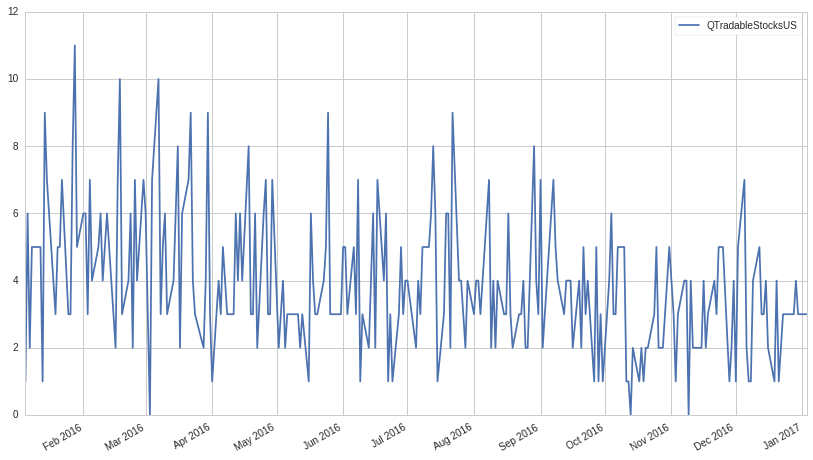

#Examining Tradability
##a. NetIncome 1500

Create a universe consisting of the top 1500 equities by net income then find and print the list of equities included in the universe on 2016-07-01.

In [0]:
universe = morningstar.income_statement.net_income.latest.top(1500)

pipe = Pipeline(
    columns={
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

pd.DataFrame(result.index.levels[1])


##b. Measuring Tradability

Find the average 200 day average dollar volume of the NetIncome 1500 universe using the AverageDollarVolume built in factor and compare to that of the QTradableStocksUS.



In [0]:
pipe = Pipeline(
    columns={'Average Dollar Volume' : AverageDollarVolume(window_length = 200)
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

print "NetIncome 1500 ADV:", np.mean(result['Average Dollar Volume'])

pipe = Pipeline(
    columns={'Average Dollar Volume' : AverageDollarVolume(window_length = 30)
    },
    screen=QTradableStocksUS()
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

print "QTradableStocksUS ADV:", np.mean(result['Average Dollar Volume'])



```
NetIncome 1500 ADV: 74816585.5336
QTradableStocksUS ADV: 61220949.8328
```



Using average dollar volume as a stand-in liquidity metric, the QTradableStocksUS is more liquid than the NetIncome 1500.

#Sector Balance
##a. Dividend 1500

Create a universe consisting of the top 1500 equities by dividend yield then find and print the list of equities included in the this universe on 2016-07-01.

In [0]:
universe = morningstar.income_statement.net_income.latest.top(1500)

pipe = Pipeline(
    columns={
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

pd.DataFrame(result.index.levels[1])


##b. Dividend 1500 Sector Composition

Find and print the sector composition of the universe on 2016-07-01.


In [0]:
SECTOR_CODE_NAMES = {
    Sector.BASIC_MATERIALS: 'Basic Materials',
    Sector.CONSUMER_CYCLICAL: 'Consumer Cyclical',
    Sector.FINANCIAL_SERVICES: 'Financial Services',
    Sector.REAL_ESTATE: 'Real Estate',
    Sector.CONSUMER_DEFENSIVE: 'Consumer Defensive',
    Sector.HEALTHCARE: 'Healthcare',
    Sector.UTILITIES: 'Utilities',
    Sector.COMMUNICATION_SERVICES: 'Communication Services',
    Sector.ENERGY: 'Energy',
    Sector.INDUSTRIALS: 'Industrials',
    Sector.TECHNOLOGY: 'Technology',
    -1 : 'Misc'
}

universe = morningstar.valuation_ratios.dividend_yield.latest.top(1500)


pipe = Pipeline(
    columns={'Sector': Sector()
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

sectors = 100*result.groupby('Sector').size()/1500
sectors.index = sectors.index.map(lambda code: SECTOR_CODE_NAMES[code])
sectors



```
Basic Materials            4.600000
Consumer Cyclical          6.066667
Financial Services        33.866667
Real Estate               21.200000
Consumer Defensive         2.133333
Healthcare                 1.800000
Utilities                  4.000000
Communication Services     2.400000
Energy                    11.800000
Industrials                8.200000
Technology                 3.933333
dtype: float64
```



The Dividend 1500 has a very unbalanced sector composition, with 34% of equities being from the financial services sector. This exposes the universe to sector risk and makes it vulnerable to volatility in the financial services sector. The QTradableStocksUS avoids this by capping the number of equities from any single sector at 30%.

#Turnover Smoothing
##a. PE 1500

Create a universe consisting of the top 1500 equities by price to earnings ratio then find and print the list of equities included in the this universe on 2016-07-01.

In [0]:
universe = morningstar.valuation_ratios.pe_ratio.latest.top(1500)

pipe = Pipeline(
    columns={
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

pd.DataFrame(result.index.levels[1])


##b. PE 1500 Turnover

Use the calculate_daily_turnover helper function to find and plot the turnover of the PE 1500 universe during 2016. Compare the average to that of the QTradableStocksUS.


In [0]:
pipe = Pipeline(
    columns={'Price to Earnings Ratio 1500' : universe
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-01-01', '2017-01-01')

result = result.unstack().fillna(False)

turnover = calculate_daily_turnover(result)

turnover.plot(figsize=(14, 8));

print turnover.describe().loc['mean']



```
Price to Earnings Ratio 1500    23.269841
Name: mean, dtype: float64
```



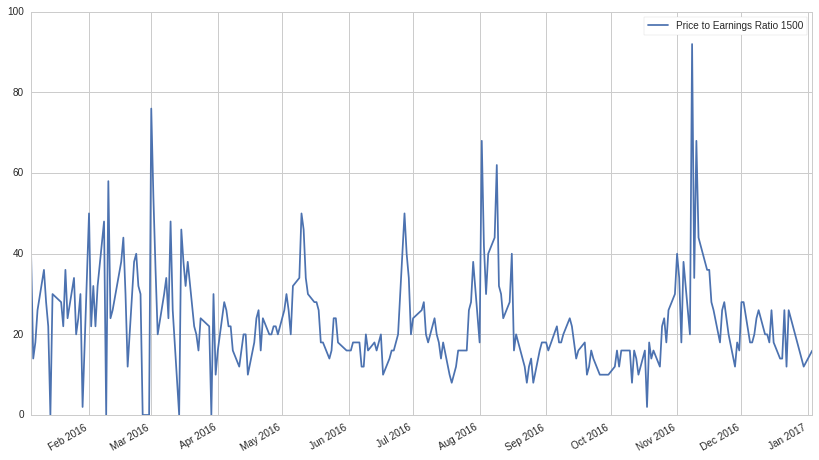

The mean turnover was almost twice as high as in the QTradableStocksUS, which has built-in smoothing features to prevent equities near the threshold from entering and exiting frequently.


##c. Smoothing the PE 1500

Using AtLeastN, apply a smoothing function to the PE 1500 to reduce turnover noise and find the new mean turnover.


In [0]:
universe_smoothed = AtLeastN(inputs=[universe],
                       window_length=21,
                       N=16,)

pipe = Pipeline(
    columns={'Smoothed PE 1500' : universe_smoothed
    },
    screen=universe_smoothed
)

result = run_pipeline(pipe, '2016-01-01', '2017-01-01')

result = result.unstack().fillna(False)

turnover = calculate_daily_turnover(result)

print turnover.describe().loc['mean']



```
Smoothed PE 1500    8.849206
Name: mean, dtype: float64
```



The mean turnover of the smoothed universe is less than half of what it was before the smoothing. This action reduced the noise from small movements near the threshold and left only the meaningful turnover events.